In [1]:
import numpy as np
import pandas as pd

import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
import scripts as scr
import c2


In [ ]:
# Use ../pygot_data/development/moscot_data/run_moscot_v4.0_scVI.py 

In [2]:
Path="../pygot_data/development/moscot_data/"

In [3]:
known_edges=list(c2.G.edges)

In [4]:
def evaluate_using_curated_transitions_got(got_res):
    res = []
    for time_pair in got_res['time_pair'].unique():
        df = got_res.loc[got_res.time_pair == time_pair]
        known_edges=list(c2.G.edges)
        known_transition=0
        unknown_transition=0
        for item in df.index:
            pred = df.loc[item]
            
            p = pred['from'].split(':')[1]
            c = pred['to'].split(':')[1]   
            edge_weight = pred['weight']
            if (p, c) in known_edges or c==p:
                known_transition+=edge_weight
            
            else:
                unknown_transition+=edge_weight
            
        all_transitions=unknown_transition+known_transition
        if all_transitions > 0:
            accuracy=known_transition/all_transitions
        else:
            accuracy=1.
        dfr=pd.DataFrame({'Accuracy':[accuracy], 'Total_weight':all_transitions, 'timepair':time_pair, 'Method':'GOT' ,'Stage': D_stage[time_pair.split('_')[0]] })
        res.append(dfr)
    return pd.concat(res)



In [5]:
D_stage={}

pregast=['E3.0', 'E3.25', 'E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25']
gast=['E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25']
organ=['E8.5', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5']

D_stage=D_stage|{pregast[i]:'Pregastrulation' for i in range(len(pregast))}
D_stage=D_stage|{gast[i]:'Gastrulation' for i in range(len(gast))}
D_stage=D_stage|{organ[i]:'Organogenesis' for i in range(len(organ))}

In [6]:
ts=['E3.0', 'E3.25', 'E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']


In [69]:
got_res = pd.read_csv('../pygot_data/development/road_map_edge_E0.5-E13.5_sde.csv')
before_d = got_res.loc[got_res.index[:4]]
#exclude zygote to 8C
got_res = got_res.loc[got_res.index[4:]]
got_res['time_pair'] = got_res.apply(lambda x: x['from'].split(':')[0] + '_' + x['to'].split(':')[0], axis=1)
got_res

,from,to,weight,dist,time_pair
4,E3.0:16C,E3.25:Trophectoderm,1.000000,0.0,E3.0_E3.25
5,E3.0:16C,E3.25:Inner cell mass,1.000000,0.0,E3.0_E3.25
6,E3.25:Trophectoderm,E3.5:Trophectoderm,0.999960,0.0,E3.25_E3.5
7,E3.25:Inner cell mass,E3.5:Inner cell mass,0.881827,0.0,E3.25_E3.5
8,E3.25:Inner cell mass,E3.5:Hypoblast,0.654739,0.0,E3.25_E3.5
...,...,...,...,...,...
499,E12.5:Retinal pigment cells,E13.5:Retinal pigment cells,0.999166,0.0,E12.5_E13.5
500,E12.5:Renal epithelium,E13.5:Renal epithelium,0.986273,0.0,E12.5_E13.5
501,E12.5:Otic epithelium,E13.5:Otic epithelium,0.993177,0.0,E12.5_E13.5
502,E12.5:Cardiomyocytes,E13.5:Cardiomyocytes,0.999277,0.0,E12.5_E13.5


In [70]:
got_res['weight'].min()

0.1074599154484241

In [71]:
dfc_got = evaluate_using_curated_transitions_got(got_res)

In [72]:
def get_averaged_accuarcy(Df):
    ss=[]
    rs=[]
    ac=[]
    for s in ['Pregastrulation', 'Gastrulation', 'Organogenesis']:
        for r in ['moscot', 'GOT']:
            
            dfs=Df[(Df['Method']==r)&(Df['Stage']==s)]
            if len(dfs) > 0:
                ss.append(s)
                rs.append(r)
                ac.append(np.average(dfs['Accuracy'], weights=dfs['Number_of_cell_types']))
    Dfc=pd.DataFrame({'Method':rs, 'Stage':ss, 'Weighted_accuracy':ac})
    return Dfc

In [79]:
got_res

,from,to,weight,dist,time_pair
4,E3.0:16C,E3.25:Trophectoderm,1.000000,0.0,E3.0_E3.25
5,E3.0:16C,E3.25:Inner cell mass,1.000000,0.0,E3.0_E3.25
6,E3.25:Trophectoderm,E3.5:Trophectoderm,0.999960,0.0,E3.25_E3.5
7,E3.25:Inner cell mass,E3.5:Inner cell mass,0.881827,0.0,E3.25_E3.5
8,E3.25:Inner cell mass,E3.5:Hypoblast,0.654739,0.0,E3.25_E3.5
...,...,...,...,...,...
499,E12.5:Retinal pigment cells,E13.5:Retinal pigment cells,0.999166,0.0,E12.5_E13.5
500,E12.5:Renal epithelium,E13.5:Renal epithelium,0.986273,0.0,E12.5_E13.5
501,E12.5:Otic epithelium,E13.5:Otic epithelium,0.993177,0.0,E12.5_E13.5
502,E12.5:Cardiomyocytes,E13.5:Cardiomyocytes,0.999277,0.0,E12.5_E13.5


In [82]:
got_res.loc[got_res.time_pair.str.startswith(ts[i])].weight.min()

0.126565182419665

In [89]:

frames=[]
dfs = []
cutoff=0.2
for i in range(19+2):
    # Use same cutoff as GOT
    if i == 15:
        continue
    cutoff = min(got_res.loc[got_res.time_pair.str.startswith(ts[i])].weight.min(), 0.45)
    if i == 16:
        cutoff = min(got_res.loc[got_res.time_pair.str.startswith(ts[i][:-1])].weight.min(), 0.45)
    
    print(ts[i], cutoff)
    ts0=ts[i]
    ts1=ts[i+1]
        #print(f'{ts0}_{ts1}')
    CT0=pd.read_pickle(f'{Path}/{ts0}_{ts1}_cell_type_transitions_scVI.pkl')
    ts0 = ts0 if not ts0.startswith('E8.5') else 'E8.5'
    ts1 = ts1 if not ts1.startswith('E8.5') else 'E8.5'
    #cutoff = min(got_res.loc[got_res['time_pair'] == ( ts0 + '_' + ts1)]['weight'].min(), 0.45)
    
    df0=c2.evaluate_using_curated_transitions(CT0, cutoff)
    df = pd.DataFrame(CT0.stack()).reset_index()
    df.columns = ['from', 'to', 'weight']
    df = df.loc[df.weight > cutoff]
    dfs.append(df)
        
    df0['Method']='moscot'
    
    dfc=pd.concat([df0], ignore_index=True)
    dfc['timepair']=ts0+'_'+ts1
    dfc['Number_of_cell_types']=CT0.shape[0]
    dfc['Stage']=D_stage[ts0]
    
    frames.append(dfc)
dfc=pd.concat(frames, ignore_index=True)
print(get_averaged_accuarcy(dfc)['Weighted_accuracy'].mean())

E3.0 0.45
E3.25 0.45
E3.5 0.45
E4.5 0.45
E5.25 0.45
E5.5 0.45
E6.25 0.45
E6.5 0.45
E6.75 0.45
E7.0 0.45
E7.25 0.3444631032096568
E7.5 0.2953238367845378
E7.75 0.1975963041686604
E8.0 0.2088879058856988
E8.25 0.45
E8.5b 0.2336424905818615
E9.5 0.1074599154484241
E10.5 0.13072043875827
E11.5 0.1140272032009406
E12.5 0.126565182419665
0.8810301850878796


In [90]:
dfc_moscot = pd.concat(dfs)
dfc_moscot['dist'] = 0.
dfc_moscot = pd.concat([before_d, dfc_moscot])
dfc_moscot = dfc_moscot.reset_index(drop=True)

In [91]:
def rename(x):
    if x[:3] == 'E7:' :
        return 'E7.0'+x[2:]
    elif x[:3] == 'E8:':
        return 'E8.0'+x[2:]
    elif x[:5] == 'E8.5b':
        return 'E8.5'+x[5:]
    elif x[:5] == 'E8.5a':
        return 'E8.5'+x[5:]
    else:
        return x
dfc_moscot['from'] = dfc_moscot['from'].apply(lambda x: rename(x))
dfc_moscot['to'] = dfc_moscot['to'].apply(lambda x: rename(x))

In [169]:
#dfc_moscot.to_csv('../pygot_data/development/road_map_edge_E0.5-E13.5_moscot.csv', index=False)

In [92]:
dfc_got['Number_of_cell_types'] = 0
different_number = {'E3.0_E3.25': 1, 'E3.25_E3.5':2, 'E3.5_E4.5':4}
for key in different_number:
    dfc_got.loc[dfc_got.timepair == key, 'Number_of_cell_types'] = different_number[key]

dfc_got.timepair = dfc_got.timepair.replace({'E8.5_E9.5':'E8.5b_E9.5', 'E8.25_E8.5':'E8.25_E8.5a'})
dfc_got = dfc_got.set_index('timepair')
idx = dfc.set_index('timepair').index[1:].intersection(dfc_got.index)
dfc_got.loc[idx, 'Number_of_cell_types'] = dfc.set_index('timepair').loc[idx].Number_of_cell_types.tolist()

dfc = dfc.loc[dfc.timepair != 'E8.5a_E8.5b']
res = pd.concat([dfc_got.reset_index(), dfc]).reset_index()

In [93]:
Dfc=get_averaged_accuarcy(res)

In [94]:
Dfc

,Method,Stage,Weighted_accuracy
0,moscot,Pregastrulation,0.929998
1,GOT,Pregastrulation,0.980852
2,moscot,Gastrulation,0.861263
3,GOT,Gastrulation,0.931400
4,moscot,Organogenesis,0.851829
5,GOT,Organogenesis,0.978369


In [95]:

import mplscience
mplscience.set_style(reset_current=True)

pal=sns.color_palette()
paln=pal.copy()
paln[0]=np.array([13,111,178])/255

In [96]:
D_stage_names0={'Pregastrulation':'Pre-Gastrulation\n (E3.5 to E6.5) ', 'Gastrulation':'Gastrulation   \n(E6.5 to E8.5)  ',
               'Organogenesis':'Organogenesis \n(E8.5 to E13.5) '}
D_stage_names1={'Pregastrulation':'Pre-Gastrulation', 'Gastrulation':'Gastrulation   ',
               'Organogenesis':'Organogenesis '}


Dfc['Stage1']=[D_stage_names1[a] for a in Dfc['Stage']]

In [97]:
moscot_paper = pd.DataFrame(
    {'Method':['moscot','moscot','moscot'],
     'Stage': ['Pregastrulation', 'Gastrulation', 'Organogenesis'],
     'Weighted_accuracy': [0.95, 0.85, 0.82],
     'Stage1': ['Pre-Gastrulation', 'Gastrulation   ', 'Organogenesis ']
    }
)

tome_paper  = pd.DataFrame(
    {'Method':['TOME','TOME','TOME'],
     'Stage': ['Pregastrulation', 'Gastrulation', 'Organogenesis'],
     'Weighted_accuracy': [0.92, 0.88, 0.825],
     'Stage1': ['Pre-Gastrulation', 'Gastrulation   ', 'Organogenesis ']
    }
)

In [98]:
plt.rcParams['font.sans-serif'] = ['Arial']

/tmp/ipykernel_4106525/3660775024.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g1=sns.barplot(ax=ax, data=pd.concat([moscot_paper, Dfc.loc[Dfc.Method == 'GOT']]), x='Weighted_accuracy', y="Stage1", hue='Method', palette=paln,


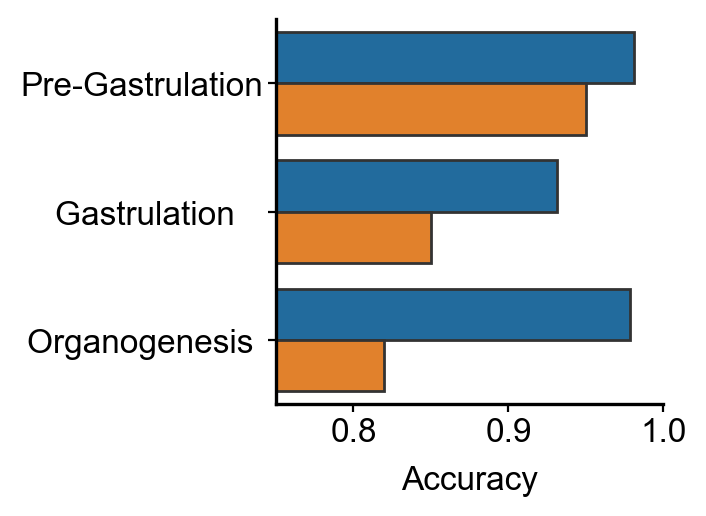

In [109]:
xlim=0.75

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=200)
g1=sns.barplot(ax=ax, data=pd.concat([moscot_paper, Dfc.loc[Dfc.Method == 'GOT']]), x='Weighted_accuracy', y="Stage1", hue='Method', palette=paln,
               linewidth=1., edgecolor='0.2', legend=False,
              hue_order=['GOT', 'moscot'])
g1.set(ylabel=None)
plt.xlabel('Accuracy', fontsize=12)
ax.set_xlim(0.75, 1)

plt.show()

/tmp/ipykernel_4106525/1826288245.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g1=sns.barplot(ax=ax, data=Dfc, x='Weighted_accuracy', y="Stage1", hue='Method', palette=paln,


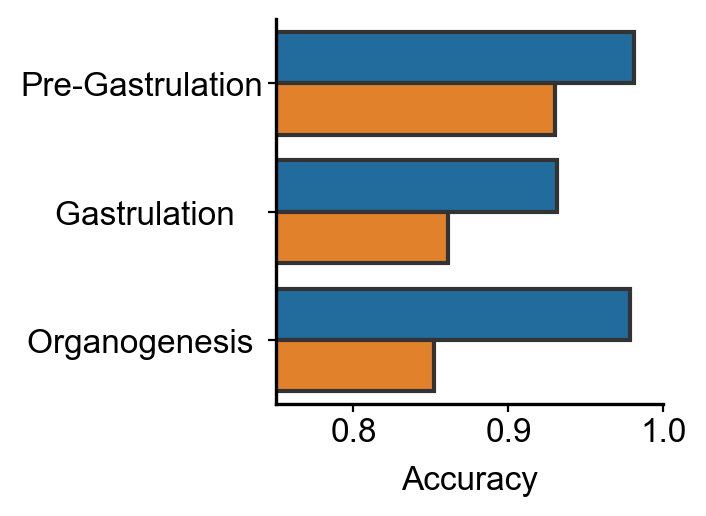

In [108]:


fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=200)
g1=sns.barplot(ax=ax, data=Dfc, x='Weighted_accuracy', y="Stage1", hue='Method', palette=paln,
               linewidth=1.5, edgecolor='0.2', legend=False,
              hue_order=['GOT', 'moscot'])
g1.set(ylabel=None)
plt.xlabel('Accuracy', fontsize=12)
ax.set_xlim(0.75, 1)
plt.show()

In [53]:
def evaluate_using_curated_transitions_got_kNN(got_res):
    res = []
    for time_pair in got_res['time_pair'].unique():
        df = got_res.loc[got_res.time_pair == time_pair]
        known_edges=list(c2.G.edges)
        known_transition=0
        unknown_transition=0
        for item in df.index:
            pred = df.loc[item]
            
            p = pred['from'].split(':')[1]
            c = pred['to'].split(':')[1]   
            edge_weight = pred['weight']
            if ((p, c) in known_edges) or (p == c):
                
                known_transition+=edge_weight
            
            else:
                unknown_transition+=edge_weight
            
        all_transitions=unknown_transition+known_transition 
        accuracy=known_transition/all_transitions if all_transitions > 0 else 1
        dfr=pd.DataFrame({'Accuracy':[accuracy], 'Total_weight':all_transitions, 'timepair':time_pair, 'Method':'GOT' ,'Stage': D_stage[time_pair.split('_')[0]] })
        res.append(dfr)
    return pd.concat(res)

In [54]:
got_res = pd.read_csv('../pygot_data/development/road_map_edge_E0.5-E13.5_sde.csv')
#exclude zygote to 8C
got_res = got_res.loc[got_res.index[4:]]
got_res['time_pair'] = got_res.apply(lambda x: x['from'].split(':')[0] + '_' + x['to'].split(':')[0], axis=1)
got_res
dfc_got = evaluate_using_curated_transitions_got_kNN(got_res)
dfc_got['Method'] = 'MkNN'

In [55]:
got_res = pd.read_csv('../pygot_data/development/road_map_edge_E0.5-E13.5_sde_kNN.csv')
#exclude zygote to 8C
got_res = got_res.loc[got_res.index[4:]]
got_res['time_pair'] = got_res.apply(lambda x: x['from'].split(':')[0] + '_' + x['to'].split(':')[0], axis=1)
got_res
dfc_got_kNN = evaluate_using_curated_transitions_got_kNN(got_res)
dfc_got_kNN['Method'] = 'kNN'

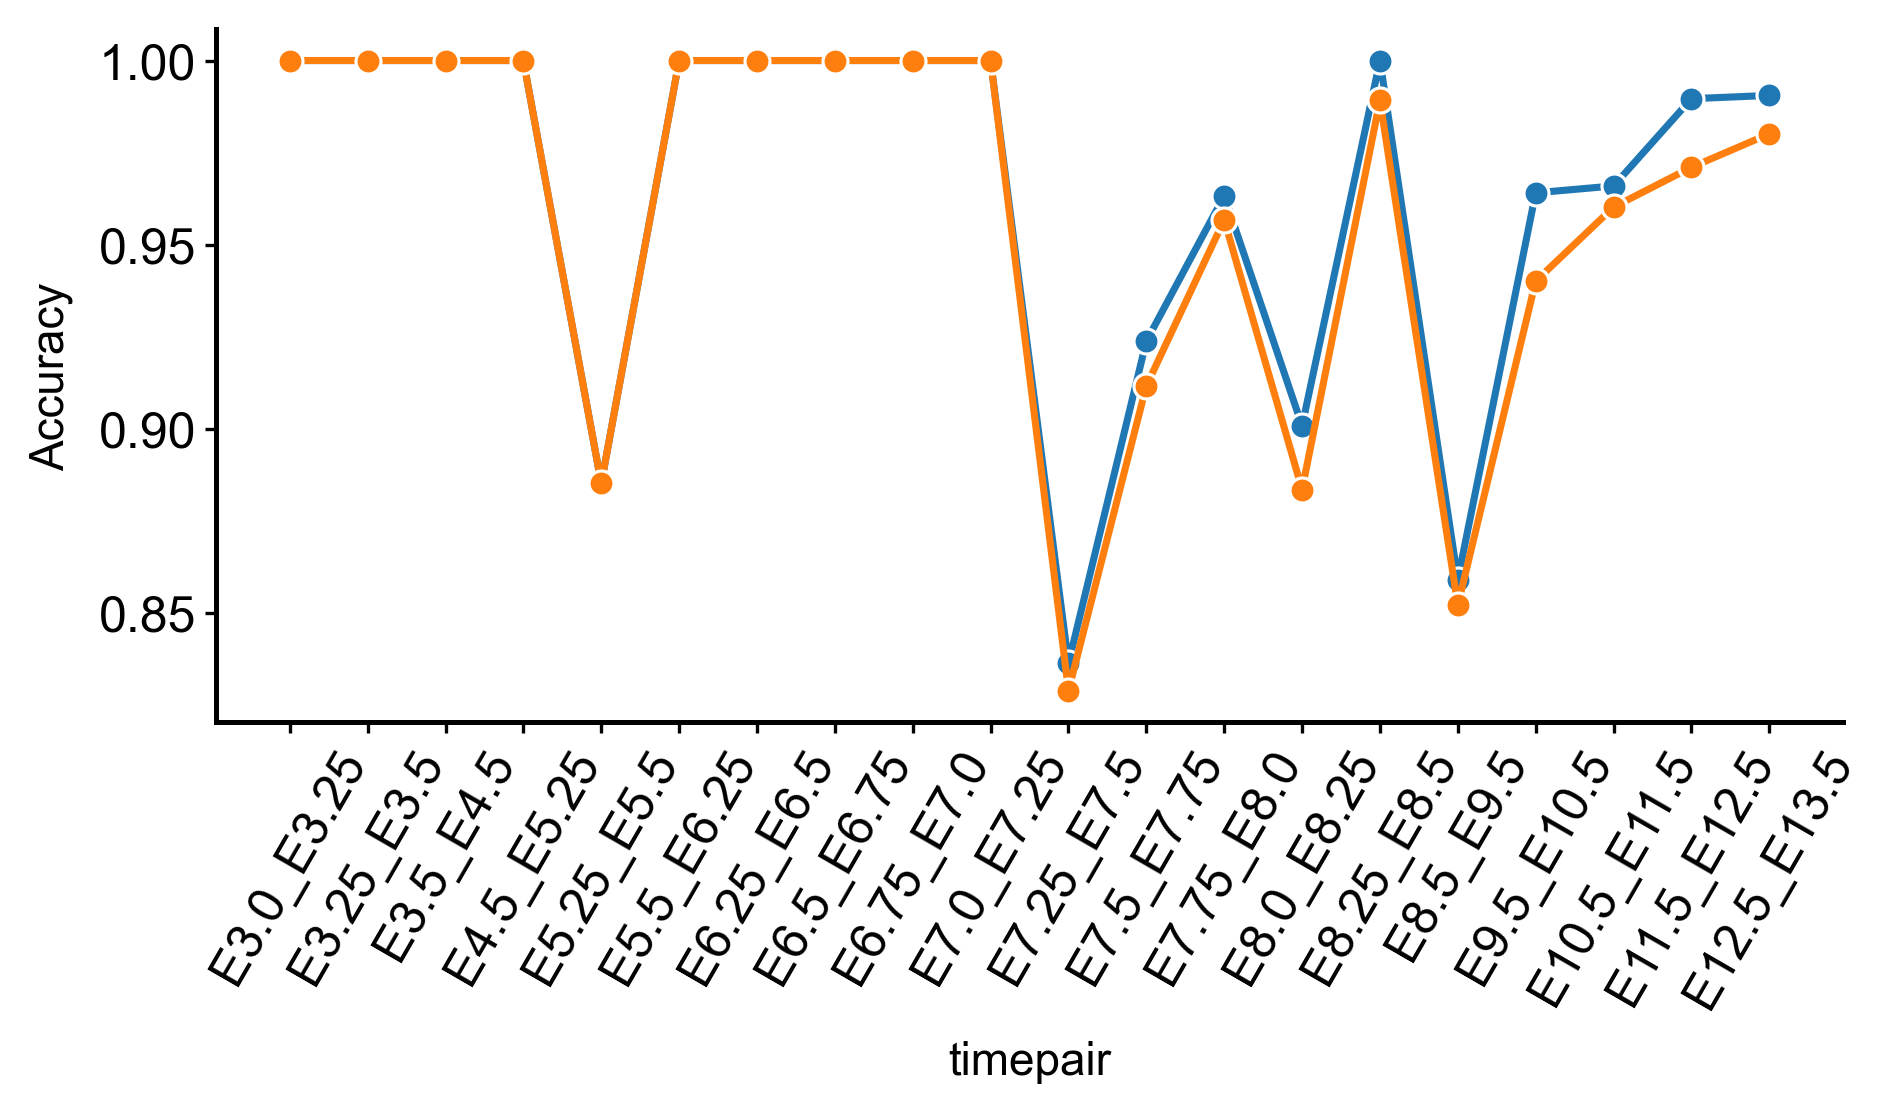

In [56]:
fig, ax = plt.subplots(1,1, figsize=(7,3), dpi=300)
sns.lineplot(pd.concat([dfc_got, dfc_got_kNN]), x='timepair', y='Accuracy', hue='Method', legend=False, marker='o', )
plt.xticks(rotation=60)
plt.show()


<Figure size 400x400 with 0 Axes>

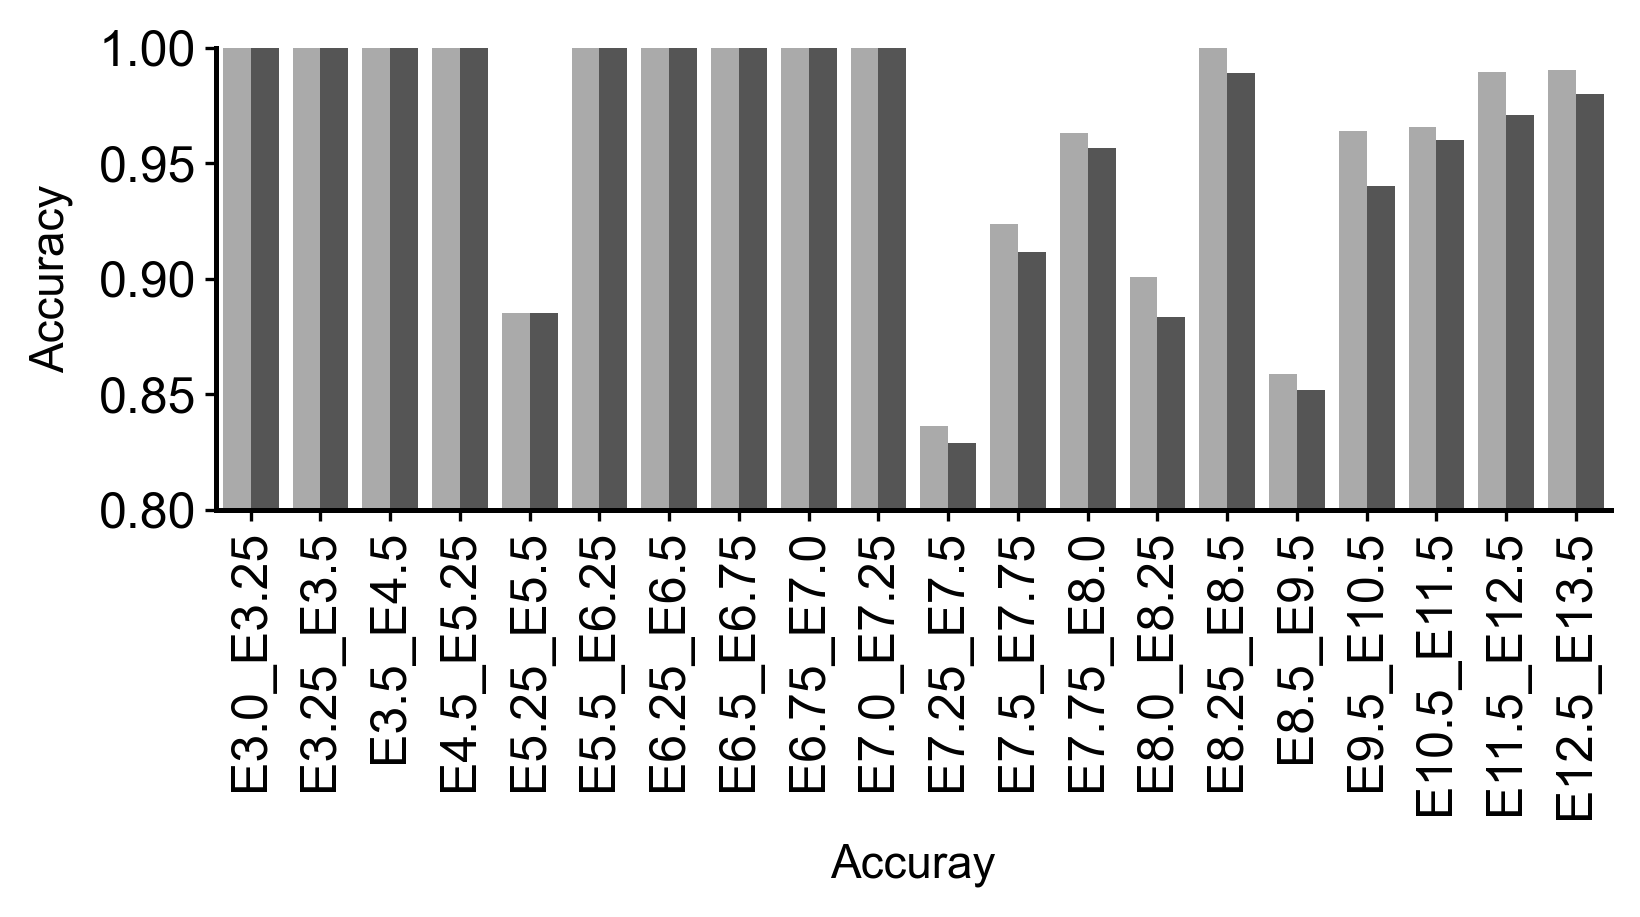

In [67]:
fig, ax = plt.subplots(1,1, figsize=(6,2), dpi=300)
sns.barplot(pd.concat([dfc_got, dfc_got_kNN]), x='timepair', y='Accuracy', hue='Method', legend=False, palette='binary')
plt.xlabel('Accuray')

ax.set_ylim(0.8, 1)
plt.xticks(rotation=90)

plt.show()